In [44]:
import reconstruction
import cv2 as cv
import matplotlib.pyplot as plt

In [47]:
def image_resize(image, width = None, height = None, inter = cv.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

[0.25781273 0.26894159 0.24989212 0.25953701]


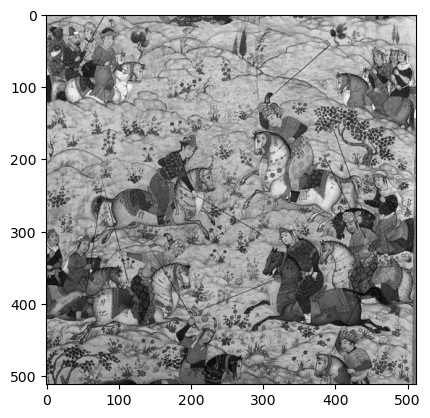

In [51]:
file_path = 'test_pics/Downloaded Persian Miniatures - Cropped and Resized/71-Juego de polo, Miniatura de Ostad Hosein Behzad -71.jpg'

pic_src = cv.imread (file_path)
pic = cv.cvtColor(pic_src, cv.COLOR_BGR2GRAY)

pic = image_resize (pic, height= 512)

aCoefs = reconstruction.calculateACoefs (pic)


print (aCoefs)
plt.imshow (pic, cmap = 'gray')
plt.show ()



# pic_recons_frompic = reconstructPicfromACoefs (aCoefs, pic)
# pic_recons_frompic_optimized = reconstructPicfromACoefs (aCoefs_optimized, pic)

In [52]:
aCoefs_optimized = reconstruction.optimizeAcoefs_2 (aCoefs, pic, reconstruction.reconstructPicfromACoefs (aCoefs, pic))

print (aCoefs_optimized)

[ 0.51794015 -0.14372077  0.50831531  0.11881669]


In [ ]:
aCoefs_optimized_old = reconstruction.optimizeAcoefs (aCoefs, pic, reconstruction.reconstructPicfromACoefs (aCoefs, pic))

print (aCoefs_optimized_old)

[0.38060681 0.1206371  0.26423526 0.22785401]


In [3]:
import pandas as pd

df = pd.DataFrame ({'file name':[], 'acoefs':[], 'aCoefs_optimized':[]})

# acoefs = [[1, 2, 3, 4], [1, 2, 3, 4], [3, 4, 5, 6]]
acoefs = [[1,2], [1,2], [4,5], [5,6]]

df.loc [:, 'acoefs'] = acoefs

df.append ({'file name':['1'], 'acoefs':[[2,2]], 'aCoefs_optimized':[[1,2]]}, ignore_index=True)

df.tail ()

C:\Users\PC\AppData\Local\Temp\ipykernel_6136\2290848051.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append ({'file name':['1'], 'acoefs':[[2,2]], 'aCoefs_optimized':[[1,2]]}, ignore_index=True)


,file name,acoefs,aCoefs_optimized
0,NaN,"[1, 2]",NaN
1,NaN,"[1, 2]",NaN
2,NaN,"[4, 5]",NaN
3,NaN,"[5, 6]",NaN


In [2]:
import DataframeCreator as dfc

dfc.appendRow (df, 'hello', [2,3], [1,2])

,file name,acoefs,aCoefs_optimized
0,NaN,"[1, 2]",NaN
1,NaN,"[1, 2]",NaN
2,NaN,"[4, 5]",NaN
3,NaN,"[5, 6]",NaN
4,hello,"[2, 3]","[1, 2]"


In [6]:
df.tail ()

,file name,acoefs,aCoefs_optimized
0,NaN,"[1, 2]",NaN
1,NaN,"[1, 2]",NaN
2,NaN,"[4, 5]",NaN
3,NaN,"[5, 6]",NaN
